<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/CatsDogsUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install the dependencies
!pip install kaggle 

In [ ]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"1bf42e8fcafb1ae625896bc6e915cd4b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d balnyaupane/cats-dogs-224-by-224-images -p /content

 91% 199M/218M [00:01<00:00, 155MB/s]
100% 218M/218M [00:01<00:00, 187MB/s]


In [ ]:
!unzip -uq "/content/cats-dogs-224-by-224-images.zip" -d "/content/Dataset"

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

In [ ]:
#Initializing CNN
classifier = Sequential()

#Adding 1st Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(224,224,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))
classifier.add(BatchNormalization())
#Adding  Dropout Layer to eliminate overfitting
# classifier.add(Dropout(0.2))

#Adding 2nd Convolution Layer
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Adding 3rd Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Adding  Dropout Layer to eliminate overfitting
classifier.add(Dropout(0.2))

#Adding Flatten Layer to convert 2D matrix into an array
classifier.add(Flatten())

#Adding Fully connected layer
classifier.add(Dense(units=64,activation='relu'))

#Adding Fully connected layer
classifier.add(Dense(units=32,activation='relu'))

#Adding Fully connected layer
classifier.add(Dense(units=16,activation='relu'))

#Adding Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0

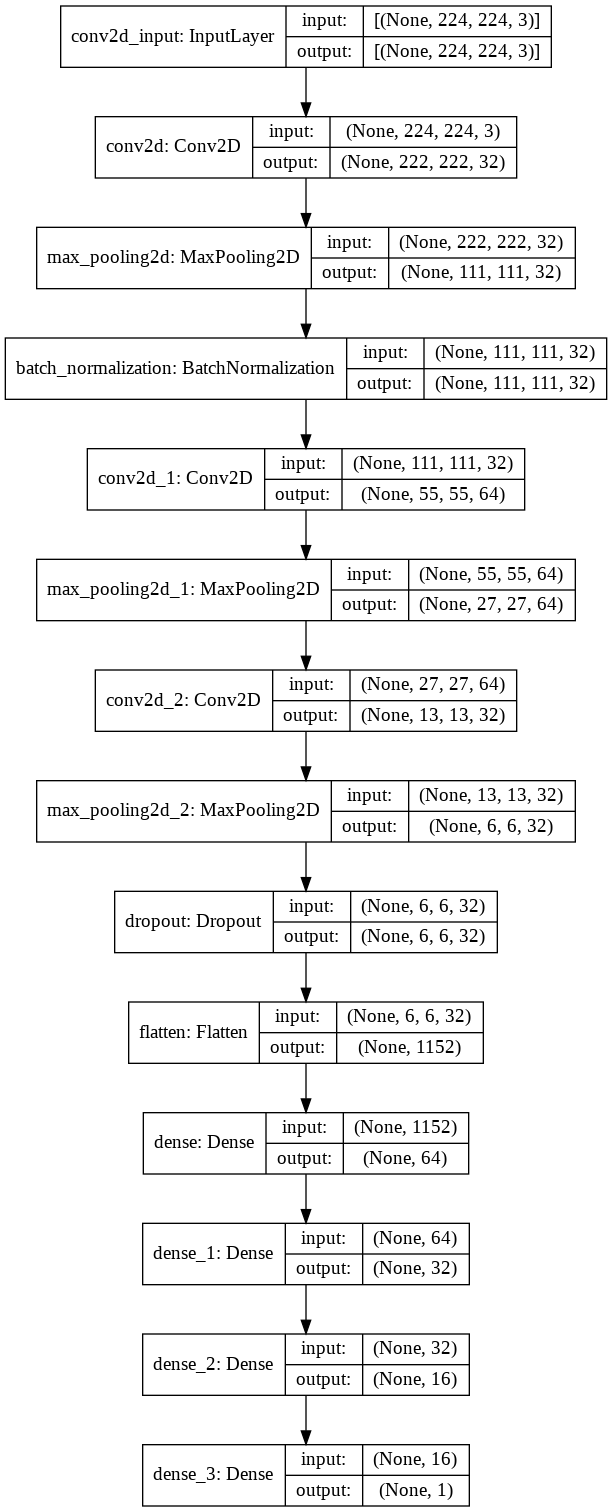

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='cat_dog_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("D:/Dataset/Dog_Cat_Dataset/trainingSet",
        target_size=(224,224),
        batch_size=64,
        shuffle = True,
        color_mode="grayscale",
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory("D:/Dataset/Dog_Cat_Dataset/testSet",
        target_size=(224,224),
        batch_size=32,
        shuffle = False,                               
        color_mode="grayscale",
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

Found 8000 images belonging to 2 classes.
training_set.class_indices:    {'cats': 0, 'dogs': 1}
Found 2000 images belonging to 2 classes.
test_set.class_indices:    {'cats': 0, 'dogs': 1}


In [ ]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=125,
        epochs=10,
        validation_data=test_set,
        validation_steps=63,
        verbose=1)

Epoch 1/10
125/125 [==============================] - 79s 632ms/step - loss: 0.5206 - accuracy: 0.7374 - val_loss: 0.5349 - val_accuracy: 0.7330
Epoch 2/10
125/125 [==============================] - 78s 624ms/step - loss: 0.5039 - accuracy: 0.7523 - val_loss: 0.5398 - val_accuracy: 0.7440
Epoch 3/10
125/125 [==============================] - 78s 625ms/step - loss: 0.4755 - accuracy: 0.7763 - val_loss: 0.4543 - val_accuracy: 0.7840
Epoch 4/10
125/125 [==============================] - 78s 626ms/step - loss: 0.4565 - accuracy: 0.7865 - val_loss: 0.4699 - val_accuracy: 0.7635
Epoch 5/10
125/125 [==============================] - 79s 630ms/step - loss: 0.4383 - accuracy: 0.7929 - val_loss: 0.4468 - val_accuracy: 0.7875
Epoch 6/10
125/125 [==============================] - 79s 629ms/step - loss: 0.4254 - accuracy: 0.8023 - val_loss: 0.4907 - val_accuracy: 0.7520
Epoch 7/10
125/125 [==============================] - 79s 629ms/step - loss: 0.4156 - accuracy: 0.8039 - val_loss: 0.4497 - val_ac

In [ ]:
# list all data in history
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


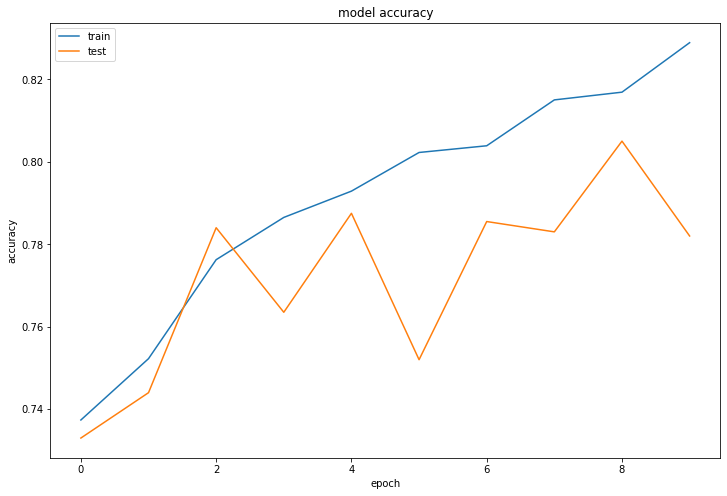

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

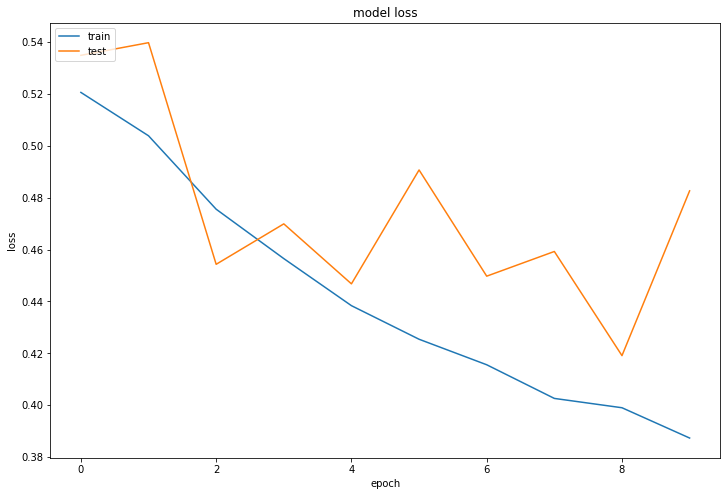

In [ ]:
# summarize history for loss
plt.figure(figsize=(8,6))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# calculate model's accuracy on test set with use of keras .evaluate_generator() function.
score = classifier.evaluate(test_set)
print("Test Accuracy: ",score[1]*100)

In [ ]:
# calculate model's accuracy on training set with use of keras .evaluate_generator() function.
score = classifier.evaluate(training_set)
print("Training Accuracy: ",score[1]*100)

In [ ]:
import numpy as np
preds = classifier.predict(test_set)
y_preds = np.where(preds >=0.5, 1, 0)

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

In [ ]:
cfm = confusion_matrix(test_set.classes, y_preds)
print(cfm)

In [ ]:
print(classification_report(test_set.classes, y_preds))

In [ ]:
group_names = ["True Positive","False Negative","False Positive","True Negative"]
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues', ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['cats', 'dogs'])
ax.yaxis.set_ticklabels(['cats', 'dogs'])
plt.show()

In [ ]:
#single prediction
import numpy as np
import cv2
from keras.preprocessing import image

In [ ]:
test_image=image.load_img('D:/Dataset/Dog_Cat_Dataset/testSet/dogs/dog_1021.jpg',target_size=(224,224),color_mode='grayscale')
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
print(np.round(result))
if result[0] >= 0.5:
    print("According to our model's prediction below image is of a Dog")
else:
    print("According to our model's prediction below image is of a Cat")

In [ ]:
path = "D:/Dataset/Dog_Cat_Dataset/testSet/dogs/dog_1021.jpg"
img = cv2.imread(path)
plt.imshow(img)